<a href="https://colab.research.google.com/github/Aban6/MIS515_Fall2024/blob/main/Week_13_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k-nearest neighbors (KNN)**

 Finding the best value of k in k-nearest neighbors (KNN)

Finding the best value for k in k-nearest neighbors (KNN) involves tuning the hyperparameter k to optimize the performance of the model. The process is often called hyperparameter tuning or model selection. Here are common methods to find the best k in KNN:

Grid Search:

Idea: Evaluate the model's performance for a range of k values and choose the one that gives the best performance.
Implementation: Train and evaluate the KNN model for different values of k, typically in a specified range. This is often done using nested ross-validation to ensure a robust evaluation.

**Import libraries**

In [ ]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

**Create a dataframe**

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adding the target column


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Build a knn model**

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Finding the best value of k**

**1. Grid Search**

In [ ]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Create the KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV for cross-validated grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best value of k
best_k_grid  = grid_search.best_params_['n_neighbors']

3

In [ ]:
#Get the accuracy with the best value for k
accuracy_grid = knn_example(best_k_grid)

1.0

**2. Elbow Method**

In [ ]:
def knn_example(k_value):
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    return accuracy

In [ ]:
k_values = range(1, 20)
accuracies_elbow = []

for k in k_values:
    accuracy = knn_example(k)
    accuracies_elbow.append(accuracy)

best_k_elbow = k_values[np.argmax(accuracies_elbow)]

1

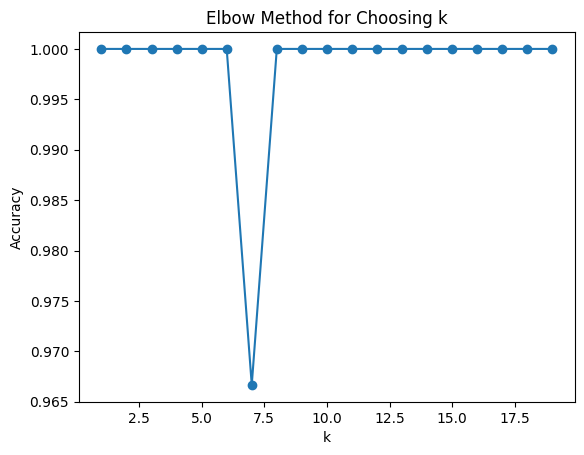

In [ ]:
# Plotting the Elbow Method results
plt.plot(k_values, accuracies_elbow, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Choosing k')
plt.show()

**3. Cross-Validation**

In [ ]:
cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

best_k_cross_val = k_values[np.argmax(cross_val_scores)]
accuracy_cross_val = knn_example(best_k_cross_val)

In [ ]:
# Print results
print("Best k from Grid Search:", best_k_grid)
print("Best k from Elbow Method:", best_k_elbow)
print("Best k from Cross-Validation:", best_k_cross_val)


Best k from Grid Search: 3
Best k from Elbow Method: 1
Best k from Cross-Validation: 3


The difference in the value of best_k_elbow compared to the other methods, such as best_k_grid and best_k_cross_val, is likely due to the nature of the Elbow Method. The Elbow Method involves plotting the model's performance (in this case, accuracy) against different k values and observing the "elbow" point where further increases in k don't significantly improve performance.

While grid search and cross-validation consider performance metrics directly, the Elbow Method relies on a graphical interpretation of the relationship between k and accuracy. The "elbow" point is where the rate of improvement in accuracy starts to diminish.

Here are some reasons why best_k_elbow might differ:

Dataset Characteristics: The Iris dataset might have certain characteristics that make the optimal k value less pronounced in the Elbow Method.

Randomness in Data Splitting: The dataset is split randomly into training and testing sets. The specific instances in the training and testing sets can influence the model's performance, and randomness in splitting can affect the results.

Sensitivity to Noise: The Elbow Method might be more sensitive to noise or variability in the dataset, leading to a less clear "elbow" point.

It's important to note that while grid search and cross-validation provide more direct optimization based on performance metrics, the Elbow Method is often used as an exploratory tool. It provides insights into the trade-off between model complexity (controlled by k) and performance but may not always align perfectly with other optimization methods.

If you find significant discrepancies between the methods, it could be useful to investigate further, potentially by running the analyses multiple times, examining the data characteristics, or considering additional diagnostic tools.